In [1]:
import pandas as pd

df = pd.read_csv('arroyo.csv', index_col=2, sep='\t')
for col in df.columns:
    if '8278' in col and 'cd' in col:
        df.rename(columns={col: 'qualification'}, inplace=True)
    elif '8278' in col:
        df.rename(columns={col: 'discharge (ft^3/s)'}, inplace=True)
        
df.head()

,agency_cd,site_no,discharge (ft^3/s),qualification
datetime,,,,
2019-04-01,USGS,11098000,10.9,A
2019-04-02,USGS,11098000,10.6,A
2019-04-03,USGS,11098000,10.4,A
2019-04-04,USGS,11098000,11.5,A
2019-04-05,USGS,11098000,11.2,A


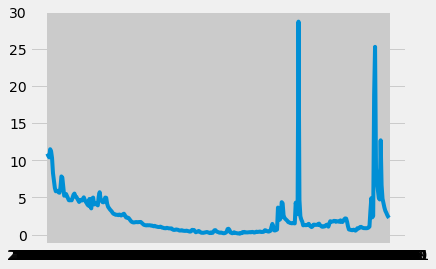

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(df.index, df['discharge (ft^3/s)'])
plt.show()

In [3]:
import zmq
import sys
import time

In [4]:
context = zmq.Context()
print("Connecting to server")
socket = context.socket(zmq.PUB)
socket.bind("tcp://*:5555")
for index, row in df.iterrows():
    print("Request:", index)
    site_no = str(row['site_no'])
    discharge = str(row['discharge (ft^3/s)'])
    qualification = row['qualification']
    socket.send_multipart([
        site_no.encode(), 
        index.encode(), 
        discharge.encode(), 
        qualification.encode()
    ])
    time.sleep(1)

Connecting to server
Request: 2019-04-01
Request: 2019-04-02
Request: 2019-04-03
Request: 2019-04-04
Request: 2019-04-05
Request: 2019-04-06
Request: 2019-04-07
Request: 2019-04-08
Request: 2019-04-09
Request: 2019-04-10
Request: 2019-04-11
Request: 2019-04-12
Request: 2019-04-13
Request: 2019-04-14
Request: 2019-04-15
Request: 2019-04-16
Request: 2019-04-17
Request: 2019-04-18
Request: 2019-04-19
Request: 2019-04-20
Request: 2019-04-21
Request: 2019-04-22
Request: 2019-04-23
Request: 2019-04-24
Request: 2019-04-25
Request: 2019-04-26
Request: 2019-04-27
Request: 2019-04-28
Request: 2019-04-29
Request: 2019-04-30
Request: 2019-05-01
Request: 2019-05-02
Request: 2019-05-03
Request: 2019-05-04
Request: 2019-05-05
Request: 2019-05-06
Request: 2019-05-07
Request: 2019-05-08
Request: 2019-05-09
Request: 2019-05-10
Request: 2019-05-11
Request: 2019-05-12
Request: 2019-05-13
Request: 2019-05-14
Request: 2019-05-15
Request: 2019-05-16
Request: 2019-05-17
Request: 2019-05-18
Request: 2019-05-19